In [1]:
import pandas as pd

In [6]:
df=pd.read_csv("credits.csv")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [7]:
df.shape

(1000, 21)

In [11]:
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [10]:
df["checking_status"].value_counts()

'no checking'    394
'<0'             274
'0<=X<200'       269
'>=200'           63
Name: checking_status, dtype: int64

In [12]:

df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [15]:
cat_cols=df.select_dtypes(["object"]).columns
cat_cols

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [14]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 

df_category=  df[cat_cols].apply(le.fit_transform)



In [17]:
df_category.head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,1,1,7,4,3,3,2,2,1,1,3,1,1,1
1,0,3,7,2,0,0,2,2,1,1,3,0,1,0
2,3,1,4,2,1,3,2,2,1,1,2,0,1,1
3,1,3,5,2,1,3,1,0,1,0,3,0,1,1
4,1,2,1,2,0,3,2,1,1,0,3,0,1,0


In [20]:
df=df.drop(cat_cols,axis=1)

In [22]:
df=pd.concat([df,df_category],axis=1)

In [23]:
df.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,credit_history,purpose,...,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,6,1169,4,4,67,2,1,1,1,7,...,3,3,2,2,1,1,3,1,1,1
1,48,5951,2,2,22,1,1,0,3,7,...,0,0,2,2,1,1,3,0,1,0
2,12,2096,2,3,49,1,2,3,1,4,...,1,3,2,2,1,1,2,0,1,1
3,42,7882,2,4,45,1,2,1,3,5,...,1,3,1,0,1,0,3,0,1,1
4,24,4870,3,4,53,2,2,1,2,1,...,0,3,2,1,1,0,3,0,1,0


In [24]:
df.isnull().sum()

duration                  0
credit_amount             0
installment_commitment    0
residence_since           0
age                       0
existing_credits          0
num_dependents            0
checking_status           0
credit_history            0
purpose                   0
savings_status            0
employment                0
personal_status           0
other_parties             0
property_magnitude        0
other_payment_plans       0
housing                   0
job                       0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [25]:
x=df.drop("class",axis=1)
y=df["class"]

In [26]:
x.shape

(1000, 20)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x = sc.fit_transform(x)  


In [28]:
#Apply PCA
from sklearn.decomposition import PCA

#PCA for all the features
pca = PCA()  
x = pca.fit_transform(x)  


In [29]:
pca.explained_variance_ratio_  

array([0.11811571, 0.09115585, 0.06984012, 0.06555279, 0.06219662,
       0.05784663, 0.05258948, 0.05143236, 0.04820015, 0.04757177,
       0.04459732, 0.04291631, 0.0406778 , 0.03789065, 0.03704678,
       0.03312784, 0.03051199, 0.0292739 , 0.02683223, 0.01262369])

In [30]:
import matplotlib.pyplot as plt

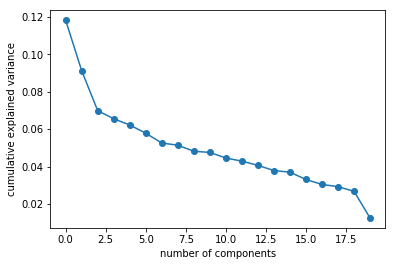

In [33]:
#Explained variance
plt.plot(pca.explained_variance_ratio_,marker="o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
#PCA for all the features
pca = PCA(n_components=2)  
x = pca.fit_transform(x)  


In [35]:
pca.explained_variance_ratio_  

array([0.11810197, 0.09112297])

In [37]:
from sklearn.cluster import KMeans

In [38]:
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
   clusters=KMeans(n_clusters=num_clusters)
   clusters.fit(x)
   cluster_errors.append(clusters.inertia_)

In [39]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,4184.498659
1,2,2622.536783
2,3,1669.051568
3,4,1352.771551
4,5,1093.385504
5,6,904.967928
6,7,785.963740
7,8,705.041787
8,9,619.858541


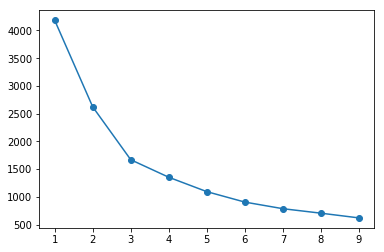

In [40]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')

In [41]:
kmeans=KMeans(n_clusters=2).fit(x)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
centroids=kmeans.cluster_centers_
print(centroids)

[[-1.00029015  0.2319683 ]
 [ 1.4818194  -0.34363542]]


In [44]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [53]:
new_df=pd.DataFrame(x)

In [54]:
new_df.head()

,0,1
0,1.818965,-2.880219
1,-1.399882,2.973140
2,0.578324,-1.667688
3,1.972843,1.188293
4,2.068611,-1.029334


In [55]:
new_df["outcome"]=kmeans.labels_

In [56]:
new_df.head()

,0,1,outcome
0,1.818965,-2.880219,1
1,-1.399882,2.973140,0
2,0.578324,-1.667688,1
3,1.972843,1.188293,1
4,2.068611,-1.029334,1


In [57]:
x1=new_df.drop("outcome",axis=1)
y1=new_df["outcome"]

In [58]:
x1.shape

(1000, 2)

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, 
                                        test_size=0.3, random_state=0) 

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=0)

In [62]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [64]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [65]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [67]:
#Train and test the model

classifier = RandomForestClassifier(criterion='entropy',max_depth=7,n_estimators=500,random_state=0)  
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))

[[190   1]
 [  2 107]]
Accuracy : 0.99


In [71]:
df.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [72]:
df1=df.drop("class",axis=1)

In [73]:
df1["outcome"]=kmeans.labels_

In [74]:
df1.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,credit_history,purpose,...,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,outcome
0,6,1169,4,4,67,2,1,1,1,7,...,3,3,2,2,1,1,3,1,1,1
1,48,5951,2,2,22,1,1,0,3,7,...,0,0,2,2,1,1,3,0,1,0
2,12,2096,2,3,49,1,2,3,1,4,...,1,3,2,2,1,1,2,0,1,1
3,42,7882,2,4,45,1,2,1,3,5,...,1,3,1,0,1,0,3,0,1,1
4,24,4870,3,4,53,2,2,1,2,1,...,0,3,2,1,1,0,3,0,1,1


In [77]:
x2=df1.drop("outcome",axis=1)
y2=df1["outcome"]

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x2 = sc.fit_transform(x2)  

In [79]:
x2.shape

(1000, 20)

In [80]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, 
                                        test_size=0.3, random_state=0) 

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=0)

In [82]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [83]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x2_train, y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [84]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [85]:
#Train and test the model

classifier = RandomForestClassifier(criterion='entropy',max_depth=8,n_estimators=200,random_state=0)  
classifier.fit(x2_train, y2_train)

# Predicting the Test set results
y2_pred = classifier.predict(x2_test)

In [86]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y2_test, y2_pred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y2_test, y2_pred)))

[[180  11]
 [ 10  99]]
Accuracy : 0.93


In [87]:
y2_pred_train = classifier.predict(x2_train)

In [88]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y2_train, y2_pred_train)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y2_train, y2_pred_train)))

[[406   0]
 [  1 293]]
Accuracy : 0.9985714285714286
